
#Utsav Jitendrabhai Patel

In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [ ]:
#Importing google drive path
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing csv file
path = "/content/drive/MyDrive/Assignment4/Mall_Customers.csv"
df = pd.read_csv(path)

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#Checking null values because that is easy for performing function
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#Fitting 2 main factor values in x
X=df[["Annual Income (k$)","Spending Score (1-100)"]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
X = np.array(X)
type(X)

numpy.ndarray

In [ ]:
from sklearn.cluster import DBSCAN



In [ ]:
outliers = []
eps_range = np.linspace(0.001,1,1000)

for eps in eps_range:
    
    dbscan = DBSCAN(eps=eps)
    y_pred = dbscan.fit_predict(X)
    
    points = 100 * np.sum(y_pred == -1)/len(y_pred)
    
    outliers.append(points)

Text(0.5, 1.0, 'Selecting Values of Epsilon')

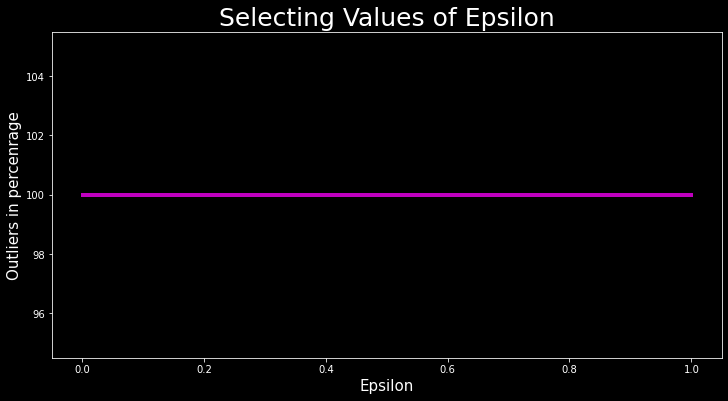

In [ ]:
plt.figure(figsize = (12,6))
plt.plot( eps_range, outliers,'m', lw = 4)
plt.ylabel("Outliers in percenrage", fontsize = 15)
plt.xlabel("Epsilon", fontsize = 15)
plt.title("Selecting Values of Epsilon", fontsize = 25)

## Selecting Minimum samples for clusters

In [ ]:
samp_outliers = []
samples_range = np.arange(1,11)

for samples in samples_range :
    
    dbscan = DBSCAN(min_samples = samples)
    y_pred = dbscan.fit_predict(X)
    
    points = 100 * np.sum(y_pred == -1)/len(y_pred)
    
    samp_outliers.append(points)

(1.0, 10.0)

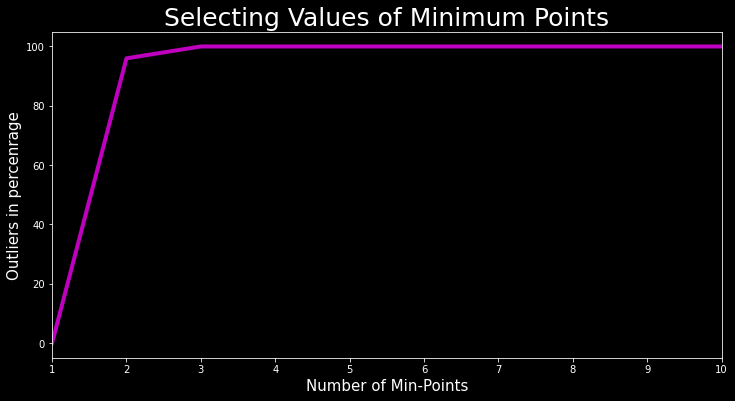

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(samples_range, samp_outliers,'m', lw = 4)
plt.ylabel("Outliers in percenrage", fontsize = 15)
plt.xlabel("Number of Min-Points", fontsize = 15)
plt.title("Selecting Values of Minimum Points", fontsize = 25)
plt.xlim([1,10])

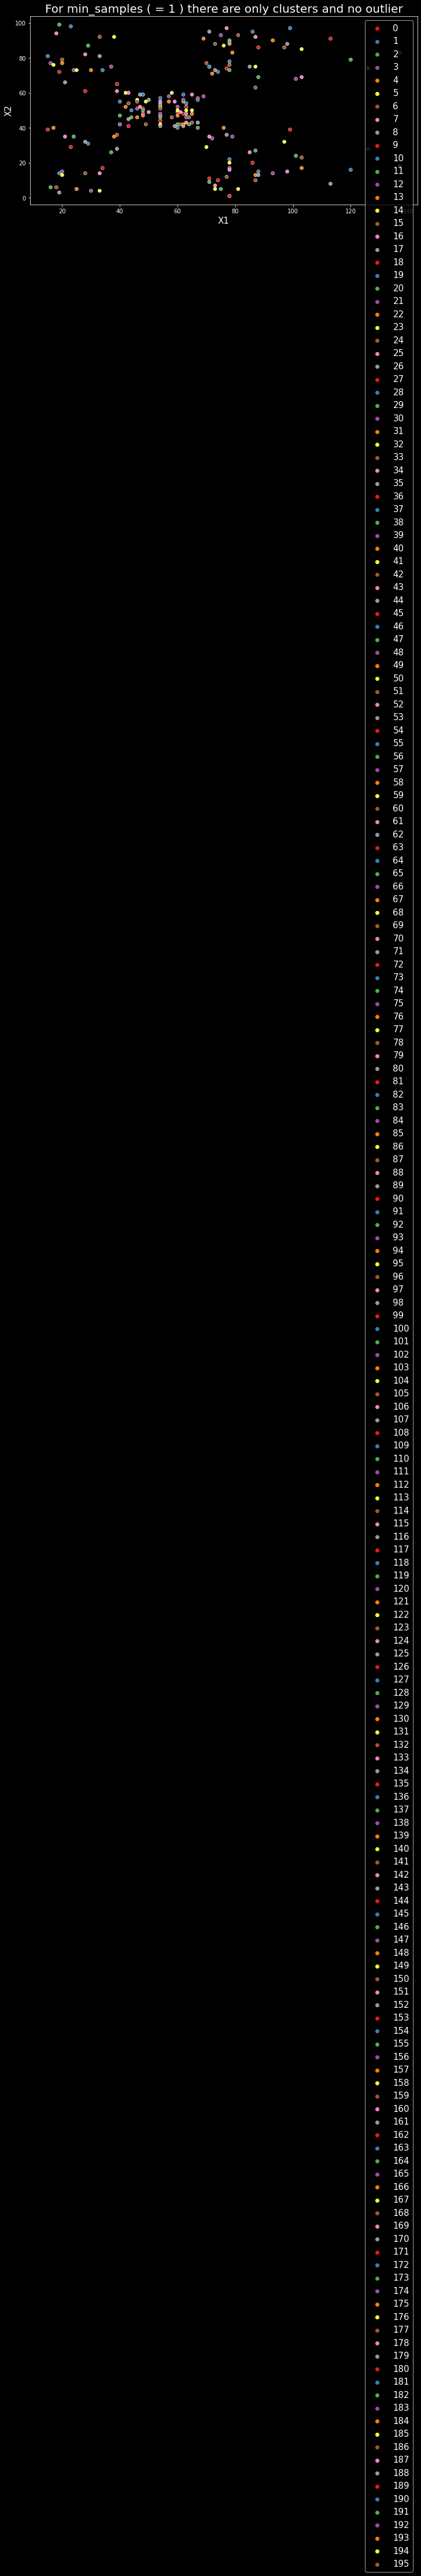

In [ ]:
dbscan = DBSCAN(min_samples = 1) # Use min_samples = 10,5,1 
y_pred = dbscan.fit_predict(X)
plt.figure(figsize = (12,6))
sns.scatterplot(data = X, x = X[:,0],y = X[:,1] ,hue = y_pred ,palette = 'Set1')
plt.title('For min_samples ( = 1 ) there are only clusters and no outlier', fontsize = 20)
plt.xlabel('X1', fontsize = 15)
plt.ylabel('X2', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

#Comparing DB Scan with K-Means

In [ ]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
dbscan = DBSCAN(eps = 11)
y_kmeans = kmeans.fit_predict(X)
y_dbscan = dbscan.fit_predict(X)

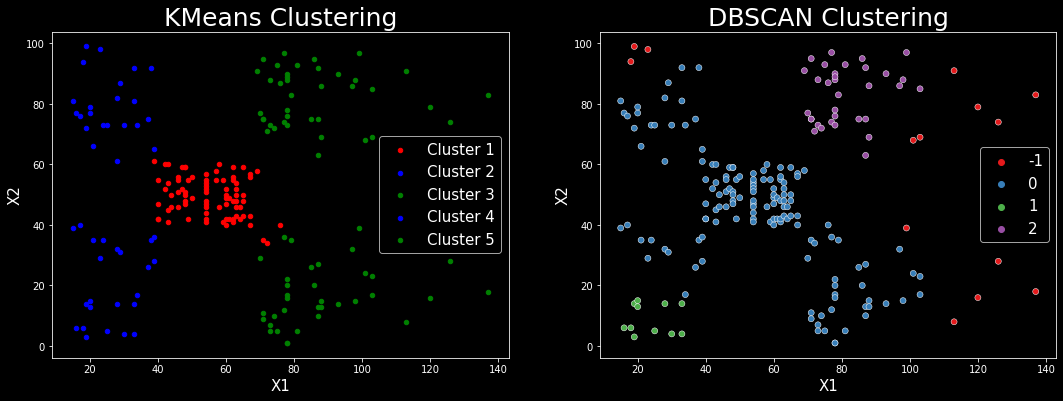

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
ax[0].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
ax[0].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
ax[0].scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 20, c = 'blue', label = 'Cluster 4')
ax[0].scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 20, c = 'green', label = 'Cluster 5')
ax[0].set_xlabel('X1', fontsize = 15)
ax[0].set_ylabel('X2', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('KMeans Clustering', fontsize = 25)


sns.scatterplot(data = X, x = X[:,0], y = X[:,1], hue = y_dbscan, palette = 'Set1')
ax[1].set_xlabel('X1', fontsize = 15)
ax[1].set_ylabel('X2', fontsize = 15)
ax[1].legend(fontsize = 15)
ax[1].set_title('DBSCAN Clustering', fontsize = 25)
plt.show()

#Silhouttev score

In [ ]:
#IMPORTING LIBRARY
from sklearn.metrics import silhouette_score
#Printing Silhouttev score for 4 cluster

print(f'Silhouette Score(n = 5) : {silhouette_score(X, y_kmeans)}')

Silhouette Score(n = 5) : 0.553931997444648


In [ ]:
#IMPORTING LIBRARY
from sklearn.metrics import silhouette_score
#Printing Silhouttev score for 4 cluster

print(f'Silhouette Score(n = 5) : {silhouette_score(X, y_dbscan)}')

Silhouette Score(n = 5) : 0.31590301995172504


DBSCAN:
      In a 2-dimensional space, DBSCAN forms clusters based on the density of data points.
      Points that are close to each other and have a high density are grouped together to form a cluster.
      Points that are far away from any cluster are considered as outliers and are shown as individual points.
      DBSCAN is capable of forming clusters of arbitrary shapes and sizes.


K-Means:
      In a 2-dimensional space, K-Means forms clusters around the center of mass of data points.
      The algorithm iteratively updates the centroids until the position of the centroids stabilizes.
      Points are then assigned to the nearest centroid and form clusters.
K-Means forms clusters of spherical shapes and the size of the clusters is determined by the number of data points and the distribution of the data.